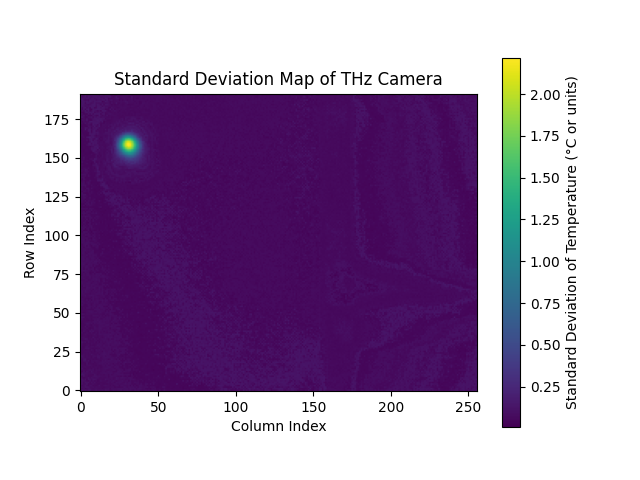

In [1]:
from Code_utilities.VideoUtilities.VideoAnalyzer import VideoAnalyzer
%matplotlib widget
csv_file_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250508/Noise_Analysis/IR_00002_Temperature Matrix.csv'
video_analysis = VideoAnalyzer(csv_file_path)
fig, ax = video_analysis.plot_std_dev_map()


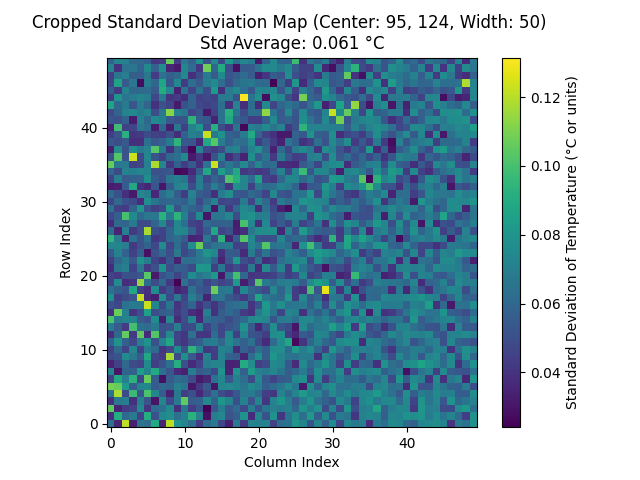

In [2]:
from Code_utilities.VideoUtilities.VideoAnalyzer import VideoAnalyzer
%matplotlib widget
csv_file_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250508/Noise_Analysis/IR_00002_Temperature Matrix.csv'
cropping_center_x = 70 + 25
cropping_center_y = 124
cropping_width = 50
video_analysis = VideoAnalyzer(csv_file_path)
fig_copped, ax_cropped, cropped_std_dev_map = video_analysis.plot_std_dev_cropped(crop_width_pixels=cropping_width,
                                                             center_x=cropping_center_x,
                                                             center_y=cropping_center_y)
fig_copped.savefig('std_dev_map.pdf')

In [3]:
import numpy as np
std_average = np.mean(cropped_std_dev_map)
std_average

0.06136029058516245

In [4]:
%matplotlib widget
from Code_utilities.DataFitter import DataFitter
from Code_utilities.SeriesAnalyzer_2 import SeriesAnalyzer_2
from Code_utilities.BeamAnalysis import BeamAnalysis

HIKMICRO_dir_path = ('/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/HIKMICRO_PowerSeries')

x_center_HIKMICRO = 152-1
y_center_HIKMICRO = 122
width = 40
measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO = .204*3.08
angle_pol_voltage_measurement_HIKMICRO = 90
moved_pol = 'first'
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width/2, x_center_HIKMICRO + width/2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width/2, y_center_HIKMICRO + width/2)
filename = '20 degrees.csv'

beam_analysis_HIKMICRO = BeamAnalysis(dir_path=HIKMICRO_dir_path,
                             signal_filename=filename,
                             camera_name='HIKMICRO',
                             crop_range_x_pixels=crop_x_range_HIKMICRO,
                             crop_range_y_pixels=crop_y_range_HIKMICRO)
fig_HIKMICRO, ax_HIKMICRO = beam_analysis_HIKMICRO.plot_map_in_pixels()

In [5]:

HIKMICRO_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=HIKMICRO_dir_path,
                                           camera_name='HIKMICRO',
                                           Y_ref_position_for_background_subtraction=2,
                                           crop_range_x_pixels=crop_x_range_HIKMICRO,
                                           crop_range_y_pixels=crop_y_range_HIKMICRO)

beam_characterization_df_HIKMICRO=HIKMICRO_SeriesAnalyzer.get_beam_char_df_w_powers(save_data_plot_bool=True,
                                   known_angle=angle_pol_voltage_measurement_HIKMICRO,
                                   kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO,
                                   moved_polarizer= moved_pol)
beam_characterization_df_HIKMICRO

Moved first polarizer


,FWHM_x (pixels),FWHM_y (pixels),total_intensity,filenames,FWHM_x (um),FWHM_y (um),angle,Power (uW)
0,9.765625,8.485417,571.0,20 degrees,126.953125,110.310417,20.0,0.267468
1,9.866725,8.740401,6098.1,50 degrees,128.267431,113.625208,50.0,1.870759
2,9.615258,8.624484,3651.8,40 degrees,124.998356,112.118290,40.0,1.091674
3,9.454866,8.205616,1702.2,30 degrees,122.913259,106.673007,30.0,0.551013
4,1.187500,1.484375,-7.8,0 degrees,15.437500,19.296875,0.0,0.155859
5,10.357617,8.734918,10950.5,90 degrees,134.649019,113.553933,90.0,4.080000
6,10.370049,8.740993,11078.0,80 degrees,134.810634,113.632907,80.0,4.041083
7,8.677083,7.212500,82.3,10 degrees,112.802083,93.762500,10.0,0.170047
8,10.102153,8.793660,8504.5,60 degrees,131.327994,114.317586,60.0,2.760379
9,10.256560,8.659341,10121.4,70 degrees,133.335280,112.571439,70.0,3.554748


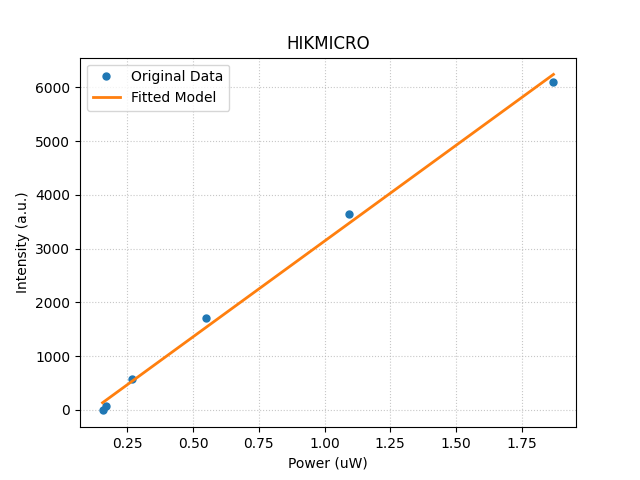

In [11]:
%matplotlib widget
beam_characterization_df_HIKMICRO_for_plot = beam_characterization_df_HIKMICRO[beam_characterization_df_HIKMICRO['Power (uW)'] <= 2]
Fitting= DataFitter(model_function='linear_model')

fig_fitting_HIKMICRO, ax_fitting_HIKMICRO=Fitting.plot_data_with_fit(
    x_data=beam_characterization_df_HIKMICRO_for_plot['Power (uW)'],
    y_data=beam_characterization_df_HIKMICRO_for_plot['total_intensity'],
    x_label='Power (uW)',
    y_label='Intensity (a.u.)',
    title='HIKMICRO',
)
fig_fitting_HIKMICRO.savefig('HIKMICRO_linearity.pdf')


In [7]:
fitting_params= Fitting.fit_params
slope=fitting_params[0]
slope

2819.5655987256273

In [8]:
NEP_uW = std_average/slope
NEP_pW=NEP_uW*10E6
NEP_pW
#TODO think about units

217.62320625877888